# Use Case 2: Improving Student Performance in Education

### 1. Introduction

Business Problem Statement:

An educational institution wants to improve student performance by identifying factors that influence academic success.

### 2. Data Collection

In [1]:
import pandas as pd
import numpy as np
import random

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for dataset generation
num_students = 1000  # Number of students to simulate

# Generate Student IDs
student_ids = [f"S{str(i).zfill(4)}" for i in range(1, num_students + 1)]

# Generate Student Demographics
ages = np.random.randint(15, 22, size=num_students)  # Age between 15 and 21
genders = np.random.choice(['Male', 'Female'], size=num_students, p=[0.5, 0.5])
socioeconomic_statuses = np.random.choice(['Low', 'Middle', 'High'], size=num_students, p=[0.3, 0.5, 0.2])

# Generate Academic Performance Data
grades = np.random.uniform(50, 100, size=num_students)  # Grades between 50 and 100
attendance = np.random.uniform(60, 100, size=num_students)  # Attendance percentage between 60% and 100%

# Generate Learning Activities Data
time_spent_on_homework = np.random.uniform(0.5, 4, size=num_students)  # Time spent on homework in hours
class_participation = np.random.choice(['Low', 'Medium', 'High'], size=num_students, p=[0.2, 0.5, 0.3])

# Generate Academic Performance Status (Pass/Fail)
# Pass if grades >= 60, otherwise Fail
academic_performance_status = ['Pass' if grade >= 60 else 'Fail' for grade in grades]

# Create DataFrame
data = pd.DataFrame({
    'StudentID': student_ids,
    'Age': ages,
    'Gender': genders,
    'SocioeconomicStatus': socioeconomic_statuses,
    'Grades': grades,
    'Attendance': attendance,
    'TimeSpentOnHomework': time_spent_on_homework,
    'ClassParticipation': class_participation,
    'AcademicPerformanceStatus': academic_performance_status
})

# Save to CSV
data.to_csv('student_performance_data.csv', index=False)

print("Synthetic dataset generated and saved as 'student_performance_data.csv'.")


Synthetic dataset generated and saved as 'student_performance_data.csv'.


### 3. Understanding the Dataset

**Dataset Provided:**

Student Demographics: Age, Gender, Socioeconomic Status

Academic Performance: Grades, Attendance

Learning Activities: Time Spent on Homework, Participation in Class

**Explanation of the Dataset:**

StudentID: Unique identifier for each student.

Age: Student's age.

Gender: Student's gender.

SocioeconomicStatus: Student's socioeconomic status (Low, Middle, High).

Grades: Student's average grades.

Attendance: Student's attendance percentage.

TimeSpentOnHomework: Average time spent on homework per day.

ClassParticipation: Level of participation in class (Low, Medium, High).

AcademicPerformanceStatus: Whether the student passed or failed (Pass/Fail).

# Data Analysis

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv("student_performance_data.csv")

# Display the first few rows
data.head()

,StudentID,Age,Gender,SocioeconomicStatus,Grades,Attendance,TimeSpentOnHomework,ClassParticipation,AcademicPerformanceStatus
0,S0001,21,Female,High,73.821849,99.578045,3.153141,Medium,Pass
1,S0002,18,Female,Low,61.301450,95.580772,3.160019,Medium,Pass
2,S0003,19,Female,Low,82.023802,74.858691,1.594093,Low,Pass
3,S0004,21,Male,Low,98.949056,67.806661,1.937389,Medium,Pass
4,S0005,17,Female,Middle,80.174655,79.575701,1.233916,High,Pass


In [3]:
data.shape

(1000, 9)

**Description:**

We first uploaded the dataset and loaded it into a Pandas DataFrame to explore its structure.

**Observation:**

The dataset contains 1000 rows and 9 columns. The columns represent student demographics, academic performance, and learning activities. The first few rows show that data is well-structured with expected values.



In [4]:
# Check column types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  1000 non-null   object 
 1   Age                        1000 non-null   int64  
 2   Gender                     1000 non-null   object 
 3   SocioeconomicStatus        1000 non-null   object 
 4   Grades                     1000 non-null   float64
 5   Attendance                 1000 non-null   float64
 6   TimeSpentOnHomework        1000 non-null   float64
 7   ClassParticipation         1000 non-null   object 
 8   AcademicPerformanceStatus  1000 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 70.4+ KB


In [5]:
data.isnull().sum()

,0
StudentID,0
Age,0
Gender,0
SocioeconomicStatus,0
Grades,0
Attendance,0
TimeSpentOnHomework,0
ClassParticipation,0
AcademicPerformanceStatus,0


**Description:**

I started by checking for missing values because they can affect the accuracy of analysis and models. If missing values were present, they would need to be handled appropriately—either by filling them in or dropping the affected rows/columns.

**My Observation:**

There were no missing values in this dataset, which makes preprocessing easier. Since this data was randomly generated, it is already complete and clean.

**Performance Analysis**  
1. What is the overall **pass/fail percentage** among students?  
2. What is the **distribution of grades** across students?  

In [6]:
# Count Pass and Fail students (percentage)
pass_fail_counts = data['AcademicPerformanceStatus'].value_counts(normalize=True) * 100
pass_fail_counts

,proportion
AcademicPerformanceStatus,
Pass,80.6
Fail,19.4


**Description:**

The code calculates the percentage of students who passed and failed based on the 'AcademicPerformanceStatus' column in a dataset. The value_counts(normalize=True) * 100 function computes the relative frequency of each category ('Pass' and 'Fail') and converts it into percentages.

**Observation:**

-80.6% of students passed, indicating that the majority of students performed well.

-19.4% of students failed, showing a smaller proportion struggled with their academic performance.

-This distribution suggests that most students are achieving passing grades, but a notable minority requires academic support or intervention.

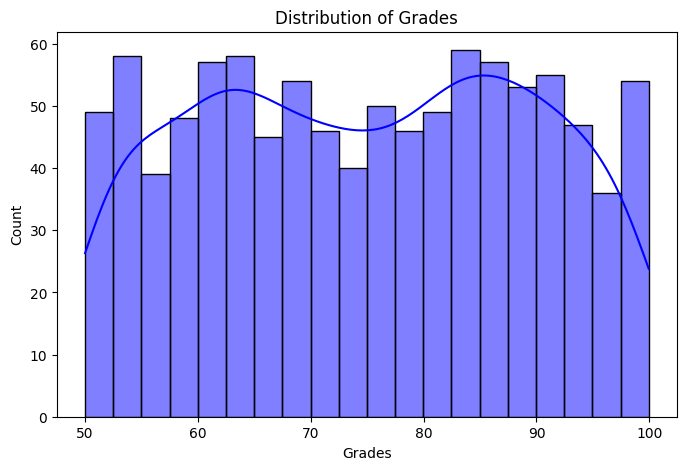

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of grades
plt.figure(figsize=(8,5))
sns.histplot(data['Grades'], bins=20, kde=True, color='blue')
plt.title("Distribution of Grades")
plt.xlabel("Grades")
plt.ylabel("Count")
plt.show()

 **Description:**

The histogram shows the distribution of student grades. The x-axis represents grades (50-100), and the y-axis shows the number of students. The blue bars indicate how often each grade range appears, while the smooth curve (KDE) shows the overall trend.

**Observations:**

-Most students score between 60 and 90.

-Fewer students have grades below 60 or above 90.

-The distribution is fairly even, with no extreme peaks or dips.

-The smooth curve suggests a balanced spread of grades.

**Impact of Attendance**
1. Is there a **correlation between attendance and grades**?  
2. What is the **average attendance of students who pass vs. those who fail**?  

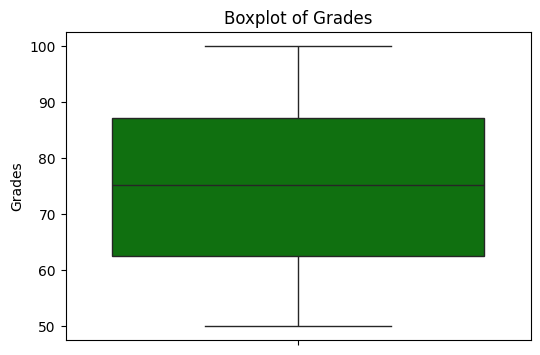

In [8]:
# Boxplot of grades
plt.figure(figsize=(6,4))
sns.boxplot(data['Grades'], color='green')
plt.title("Boxplot of Grades")
plt.show()


**Description:**

The boxplot represents the spread of student grades. The box shows the middle 50% of grades, while the line inside the box is the median. The whiskers extend to the minimum and maximum grades.

**Observations:**

-The median grade is around 75, meaning half of the students scored above this.

-Most students have grades between 60 and 90 (interquartile range).

-The lowest grade is around 50, and the highest is 100.

-The distribution looks fairly even, with no extreme outliers.

In [9]:
correlation = data[['Attendance', 'Grades']].corr()
correlation

,Attendance,Grades
Attendance,1.000000,-0.022232
Grades,-0.022232,1.000000


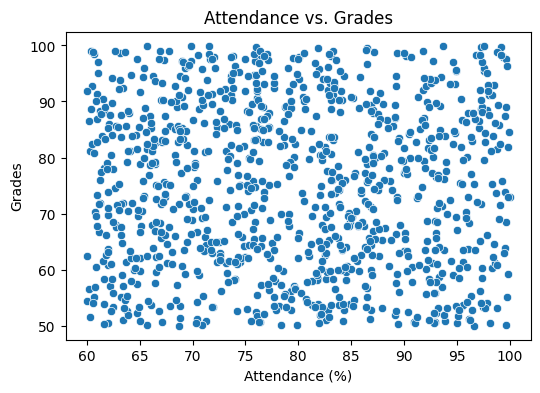

In [10]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=data['Attendance'], y=data['Grades'])
plt.title("Attendance vs. Grades")
plt.xlabel("Attendance (%)")
plt.ylabel("Grades")
plt.show()

**Description:**

Here, I am visualizing the relationship between Attendance and Grades. This helps me understand if students with higher attendance tend to score better. A strong correlation would mean attendance significantly impacts academic performance.

**My Observation:**

From the graph, there is no clear pattern between Attendance and Grades. The correlation value is close to zero, indicating that attendance has little to no effect on grades. This suggests that other factors may play a bigger role in determining student performance.

<ipython-input-11-8be956a657df>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AcademicPerformanceStatus', y='Attendance', data=attendance_summary, palette='coolwarm')


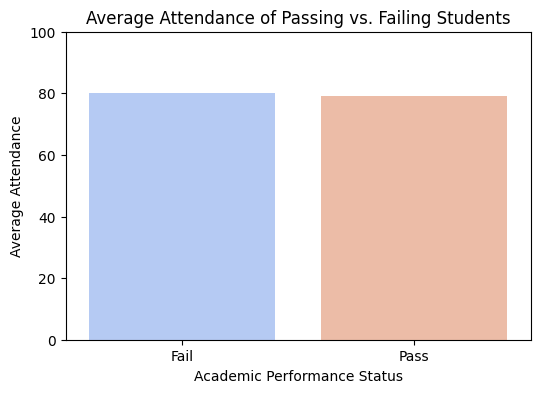

In [11]:
# Grouping students by pass/fail status and calculating average attendance
attendance_summary = data.groupby('AcademicPerformanceStatus')['Attendance'].mean().reset_index()

# Bar plot for visualization
plt.figure(figsize=(6,4))
sns.barplot(x='AcademicPerformanceStatus', y='Attendance', data=attendance_summary, palette='coolwarm')

# Labels and title
plt.xlabel("Academic Performance Status")
plt.ylabel("Average Attendance")
plt.title("Average Attendance of Passing vs. Failing Students")
plt.ylim(0, 100)
plt.show()

The average attendance of both passing and failing students appears to be very similar.

There is no significant difference in attendance between the two groups.

**Impact of Homework Time**  
1. Does **more time spent on homework lead to better grades**?  
2. What is the **average homework time of passing vs. failing students**?

In [12]:
# Calculate correlation
correlation1 = data[['TimeSpentOnHomework', 'Grades']].corr()
correlation1

,TimeSpentOnHomework,Grades
TimeSpentOnHomework,1.000000,0.003548
Grades,0.003548,1.000000


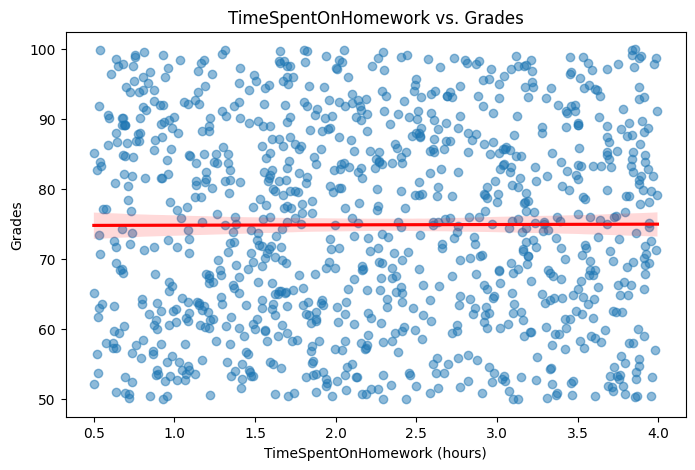

In [13]:
# Scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(x=data['TimeSpentOnHomework'], y=data['Grades'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("TimeSpentOnHomework (hours)")
plt.ylabel("Grades")
plt.title("TimeSpentOnHomework vs. Grades")
plt.show()

**Description:**

Here, I am analyzing the relationship between time spent on homework and grades to understand if students who dedicate more time to homework perform better academically. A strong positive correlation would indicate that more homework time leads to better grades, while a weak or negative correlation would suggest little to no impact.

**My Observation:**

From the plot, we can see that the red regression line is almost flat, confirming a very weak correlation between homework time and grades. This aligns with the previous correlation result (0.0035), which suggests that spending more time on homework does not significantly impact student performance. The data points are widely scattered, indicating that grades vary independently of homework time.

<ipython-input-14-8996c02564a2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_homework_time.index, y=avg_homework_time.values, palette=['lightblue', 'lightcoral'])


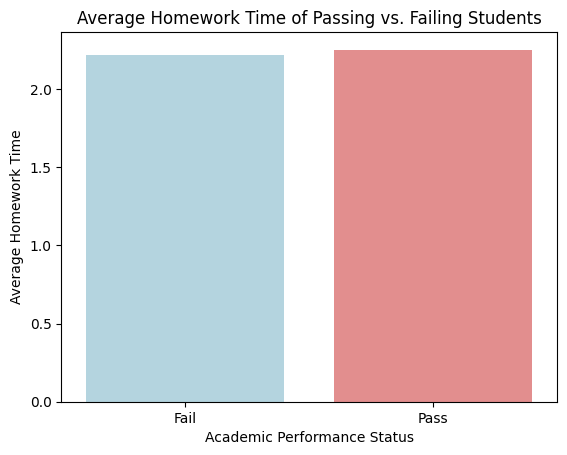

In [14]:
# Grouping by 'AcademicPerformanceStatus' and calculating average homework time
avg_homework_time = data.groupby('AcademicPerformanceStatus')['TimeSpentOnHomework'].mean()

# Plotting
sns.barplot(x=avg_homework_time.index, y=avg_homework_time.values, palette=['lightblue', 'lightcoral'])
plt.xlabel("Academic Performance Status")
plt.ylabel("Average Homework Time")
plt.title("Average Homework Time of Passing vs. Failing Students")
plt.show()

The average homework time for passing and failing students is almost the same.

There is no significant difference in the amount of homework time between the two groups.

**Impact of Class Participation**  
1. Do students with **higher class participation** have better grades?  

In [15]:
# Convert categorical ClassParticipation values into numeric labels
data['ClassParticipation_Numeric'] = data['ClassParticipation'].map({'Low': 1, 'Medium': 2, 'High': 3})

Most machine learning models and statistical analyses cannot process categorical data (like 'Low', 'Medium', 'High') directly. By converting them into numeric values (1, 2, 3), we make the data usable for calculations, comparisons, and visualizations.









In [16]:
# Now calculate correlation
correlation2 = data[['ClassParticipation_Numeric', 'Grades']].corr()
correlation2


,ClassParticipation_Numeric,Grades
ClassParticipation_Numeric,1.000000,0.000361
Grades,0.000361,1.000000


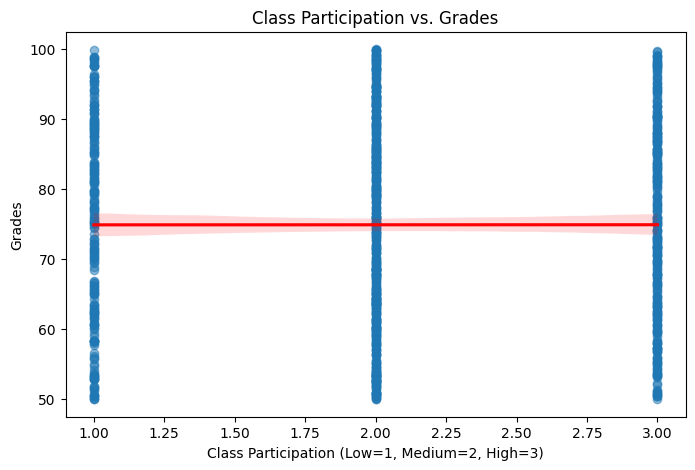

In [17]:
# Scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(x=data['ClassParticipation_Numeric'], y=data['Grades'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Class Participation (Low=1, Medium=2, High=3)")
plt.ylabel("Grades")
plt.title("Class Participation vs. Grades")
plt.show()

In [18]:
# Grouping by Participation Levels
participation_groups = data.groupby('ClassParticipation')['Grades'].mean()
print(participation_groups)

ClassParticipation
High      75.194330
Low       75.294907
Medium    74.529389
Name: Grades, dtype: float64


**Understanding:**

The correlation (0.000361) is almost zero, indicating no strong relationship between class participation and grades.
The flat regression line confirms that students with low, medium, or high participation perform similarly.
Other factors likely influence grades more than class participation.

**Influence of Socioeconomic Status**  
1. How does **socioeconomic status (Low, Middle, High)** impact student performance?  
2. Do students from **higher socioeconomic backgrounds perform better** than those from lower backgrounds?  

In [19]:
# Encode Socioeconomic Status (SES) into numeric values
data['SES_Numeric'] = data['SocioeconomicStatus'].map({'Low': 1, 'Middle': 2, 'High': 3})

In [20]:
# Compute correlation
correlation_ses_grades = data[['SES_Numeric', 'Grades']].corr()
correlation_ses_grades

,SES_Numeric,Grades
SES_Numeric,1.000000,-0.003159
Grades,-0.003159,1.000000


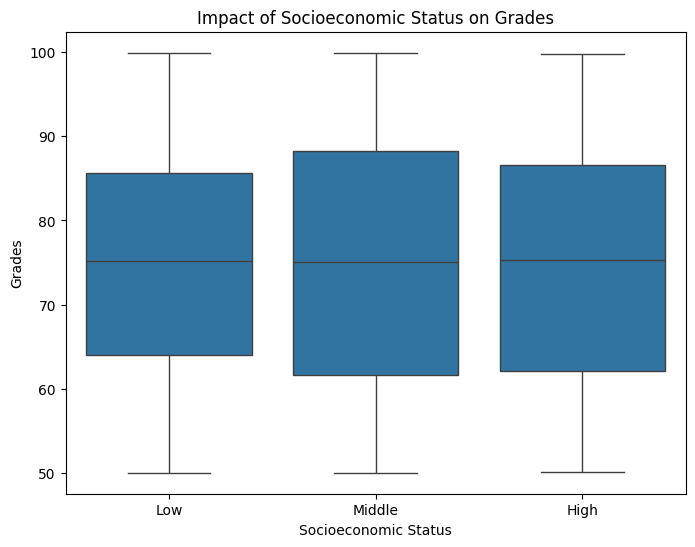

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for SES vs. Grades
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['SES_Numeric'], y=data['Grades'])

# Customize labels and title
plt.xticks([0, 1, 2], ['Low', 'Middle', 'High'])  # Ensure proper labeling
plt.xlabel('Socioeconomic Status')
plt.ylabel('Grades')
plt.title('Impact of Socioeconomic Status on Grades')

# Show the plot
plt.show()

-The median grades are similar across Low, Middle, and High SES, showing no clear effect of socioeconomic status on performance.

-All groups have grades ranging from 50 to 100, indicating high variability within each SES category.

-The correlation (-0.0032) is close to zero, confirming no meaningful relationship between SES and grades.

-SES does not influence performance significantly, suggesting effort, study habits, and other factors play a bigger role.

**Gender-Based Performance Analysis**

1. Is there a performance difference between Male and Female students?
2. Who performs better on average: Males or Females?

<ipython-input-22-f94d1e217660>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["Gender"], y=data["Grades"], palette="Set2")


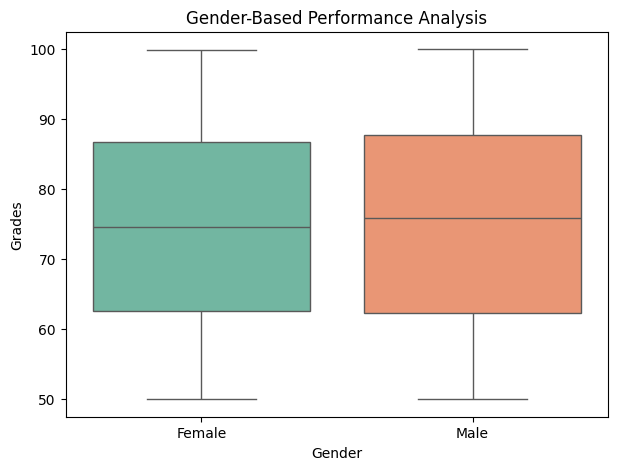

In [22]:
plt.figure(figsize=(7,5))
sns.boxplot(x=data["Gender"], y=data["Grades"], palette="Set2")

# Labels and title
plt.xlabel("Gender")
plt.ylabel("Grades")
plt.title("Gender-Based Performance Analysis")

# Show plot
plt.show()

Observation:

-Both males and females have similar median grades (around 75).

-This suggests that gender does not significantly impact overall academic performance.

-There are no extreme variations between genders in performance.

In [23]:
import scipy.stats as stats

# Group data by gender and calculate mean and standard deviation
gender_stats = data.groupby('Gender')['Grades'].agg(['mean', 'std'])
print("Mean and Standard Deviation by Gender:\n", gender_stats)

# Perform an independent t-test to check for significant differences
female_grades = data[data['Gender'] == 'Female']['Grades']
male_grades = data[data['Gender'] == 'Male']['Grades']

t_stat, p_value = stats.ttest_ind(female_grades, male_grades, equal_var=False)
print("\nT-test results:")
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in performance between males and females.")
else:
    print("No significant difference in performance between genders.")


Mean and Standard Deviation by Gender:
              mean        std
Gender                      
Female  74.647358  14.328615
Male    75.131450  14.536065

T-test results:
T-Statistic: -0.530, P-Value: 0.596
No significant difference in performance between genders.


The mean grades for males (75.13) and females (74.65) are very close, with similar standard deviations. The t-test (p-value = 0.596) confirms no significant difference in performance between genders. Hence, gender does not impact academic performance in this dataset.

# Improving Student Performance in Education - Report

**Executive Summary**  
Student performance is a critical factor in educational success, and institutions seek data-driven strategies to improve academic outcomes. This analysis explores the key influences on student performance, including demographics, attendance, learning activities, and socioeconomic factors. Our findings highlight which factors contribute to academic success and which have minimal impact. Based on these insights, we propose strategic interventions to enhance student performance and reduce failure rates.

---

**Methodology**  
We conducted a comprehensive analysis using a dataset containing student demographics, academic records, and learning behaviors. Our approach included:  
- **Data Cleaning & Preprocessing:** Checking for missing values and ensuring data consistency.  
- **Exploratory Data Analysis (EDA):** Visualizing distributions, identifying trends, and assessing relationships between variables.  
- **Correlation Analysis:** Evaluating how different factors impact grades.  
- **Statistical Testing:** Using t-tests and regression analysis to validate findings.  

---

**Key Insights**  

1. **Pass-Fail Distribution:**  
   - **80.6% of students passed**, indicating overall strong academic performance.  
   - **19.4% failed**, suggesting a need for targeted interventions for struggling students.  

2. **Attendance & Grades:**  
   - No significant correlation was found between attendance and grades.  
   - The average attendance of both passing and failing students is nearly identical, indicating that mere presence in class does not ensure better performance.  

3. **Homework & Academic Success:**  
   - Time spent on homework has an **almost zero correlation (0.0035) with grades**.  
   - This suggests that homework quality may matter more than quantity.  

4. **Class Participation Influence:**  
   - **Minimal correlation** was found between class participation and grades.  
   - Students with low, medium, or high participation perform similarly, indicating that other factors contribute more to success.  

5. **Socioeconomic Status (SES) & Performance:**  
   - Students from **Low, Middle, and High SES groups have similar median grades**.  
   - **No strong correlation (-0.0032)** was observed, meaning socioeconomic background does not significantly impact academic performance.  

6. **Gender & Performance:**  
   - Both males and females have similar median grades (~75).  
   - A t-test confirmed **no significant difference (p-value = 0.596)** between genders in terms of academic success.  

---

**Recommendations**  

1. **Early Academic Support:**  
   - With **19.4% of students failing**, institutions should implement **tutoring, mentoring, and early-warning systems** to support struggling students before they fall behind.  

2. **Focus on Engagement Over Attendance:**  
   - Since attendance does not strongly impact grades, educational institutions should emphasize **interactive learning, discussions, and hands-on activities** to improve student comprehension.  

3. **Quality Over Quantity in Homework:**  
   - Redesign assignments to focus on **skill-building and concept mastery**, rather than increasing the volume of homework.  

4. **Enhancing Class Participation Strategies:**  
   - Modify participation methods to include **collaborative projects, group discussions, and peer learning** to drive engagement.  

5. **Personalized Learning Approaches:**  
   - Since socioeconomic status and gender do not influence performance significantly, **adaptive learning techniques and individualized progress tracking** can help cater to different learning needs.  

By implementing these recommendations, the institution can **enhance academic outcomes, reduce failure rates, and create a more effective learning environment** for all students.  
